# Filter *.h5 files & background correction
### Johanna Rahm, Sebastian Malkusch
#### Research group Heilemann
#### Institute for Physical and Theoretical Chemistry, Goethe University Frankfurt a.M.

## Load cell.h5 files

Choose/insert a directory for the cell files to be searched in (e.g. F:\Marburg\single_colour_tracking\resting). All *.h5 files in the directory will be loaded for the analysis.

In [1]:
from pySPT.widgets.widgetNotebooks import init_filter_notebook
from pySPT.widgets.widgetNotebooks import track_stats_widget_arrangement
from pySPT.widgets import widgetLoadHdf5
from pySPT.widgets import loadHdf5
from pySPT.analysis import cell
from pySPT.analysis import trajectory
from pySPT.analysis import coverSlip
from pySPT.analysis import trajectoryStatistics
widget_load_hdf5 = widgetLoadHdf5.WidgetLoadHdf5()
load_hdf5 = loadHdf5.LoadHdf5()
cover_slip = coverSlip.CoverSlip()
track_stats = trajectoryStatistics.TrajectoryStatistics()
display(widget_load_hdf5.dir_box, widget_load_hdf5.dir_button)
widget_load_hdf5.dir_button.on_click(widget_load_hdf5.open_dir)
widget_load_hdf5.dir_box.observe(widget_load_hdf5.change_dir_box)

Text(value='directory to be searched in', description='directory', placeholder='Type something', style=Descrip…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

In [2]:
def initialize(event):
    init_filter_notebook(cover_slip, widget_load_hdf5, load_hdf5, is_cell=True)
    track_stats.cells = cover_slip.cells
    track_stats.calc_min_rossier_length()
    widget_load_hdf5.min_length = track_stats.tau_threshold_min_length
display(widget_load_hdf5.init_cells_button)
widget_load_hdf5.init_cells_button.on_click(initialize)

Button(description='initialize', style=ButtonStyle(), tooltip='initialize objects')

Initialization took 2.5264718532562256 s
BG: [] []
cells: [<pySPT.analysis.cell.Cell object at 0x000002131BF09DA0>, <pySPT.analysis.cell.Cell object at 0x000002131FEFDF28>] ['C:/Users/pcoffice37/Documents/testing_file_search/more cells/cell01_02\\cell1\\cell_1_MMStack_Pos0.ome_MIA.h5', 'C:/Users/pcoffice37/Documents/testing_file_search/more cells/cell01_02\\cell2\\cell_2_MMStack_Pos0.ome_MIA.h5']
before cell 20.0 <class 'numpy.float64'>
before self inf <class 'float'>
<class 'numpy.float64'>
before cell 20.0 <class 'numpy.float64'>
before self 20.0 <class 'numpy.float64'>
20.0 <class 'str'>


## Load background.h5 files

Choose/insert a directory for the background files to be searched in (e.g. F:\Marburg\single_colour_tracking\resting). All *.h5 files in the directory will be loaded for the analysis. Background correction is recommended but optional.

In [3]:
display(widget_load_hdf5.dir_box_bg, widget_load_hdf5.dir_button_bg)
widget_load_hdf5.dir_box_bg.observe(widget_load_hdf5.change_dir_box_bg)
widget_load_hdf5.dir_button_bg.on_click(widget_load_hdf5.open_dir_bg)

Text(value='directory to be searched in', description='directory', placeholder='Type something', style=Descrip…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

In [4]:
def initialize(event):
    init_filter_notebook(cover_slip, widget_load_hdf5, load_hdf5, is_cell=False)
display(widget_load_hdf5.init_background_button)
widget_load_hdf5.init_background_button.on_click(initialize)

Button(description='initialize', style=ButtonStyle(), tooltip='initialize objects')

## Filter for parameters

Floating point numbers have to be separated with a dot (e.g. 2.123). If no filter parameters or invalid parameters are given, the min and max values will be set automatically. All boxes that are checked will be included in the filtered data. If one wants to filter multiple times, the JNB has to be restarted.

In [5]:
def filter(event):
    widget_load_hdf5.create_clear_output()
    track_stats.cell_trajectories = cover_slip.cell_trajectories
    track_stats.background_trajectories = cover_slip.background_trajectories
    track_stats.run_statistics(widget_load_hdf5.min_length_box.value, widget_load_hdf5.max_length_box.value, widget_load_hdf5.min_D_box.value, widget_load_hdf5.max_D_box.value, widget_load_hdf5.immob_type_check_box.value,  widget_load_hdf5.confined_type_check_box.value, widget_load_hdf5.free_type_check_box.value, widget_load_hdf5.analyse_successful_check_box.value, widget_load_hdf5.analyse_not_successful_check_box.value)
#display(widget_load_hdf5.min_length_box, widget_load_hdf5.max_length_box, widget_load_hdf5.min_D_box, widget_load_hdf5.max_D_box, widget_load_hdf5.immob_type_check_box, widget_load_hdf5.confined_type_check_box, widget_load_hdf5.free_type_check_box, widget_load_hdf5.analyse_successful_check_box, widget_load_hdf5.analyse_not_successful_check_box, widget_load_hdf5.filter_button)
widget_load_hdf5.min_length_box.observe(widget_load_hdf5.init_cells_button)
widget_load_hdf5.min_length_box.observe(widget_load_hdf5.init_cells_button)
widget_load_hdf5.filter_button.on_click(filter)
track_stats_widget_arrangement(widget_load_hdf5.min_length_box, widget_load_hdf5.max_length_box, widget_load_hdf5.min_D_box, widget_load_hdf5.max_D_box, widget_load_hdf5.filter_button, widget_load_hdf5.immob_type_check_box, widget_load_hdf5.confined_type_check_box, widget_load_hdf5.free_type_check_box, widget_load_hdf5.analyse_successful_check_box, widget_load_hdf5.analyse_not_successful_check_box)

max trajectory length: 538
min trajectory length: 8
max diffusion coefficient: 2.4615554891102156 [μm²/s]
min diffusion coefficient: 1e-05 [μm²/s]
15.8 % are immobile
38.1 % are confined
46.1 % are free
Total trajectories: 499


## Choose trajectory to plot

Choose a cell. If one wants to plot multiple times, choose a new cell and/or trajectory reload the plotting cell by clicking in the cell and pressing strg+enter.

In [6]:
def dropdown(event):
    widget_load_hdf5.cell_options = widget_load_hdf5.get_cell_names(cover_slip.cells, track_stats.cell_trajectories_filtered)
widget_load_hdf5.filter_button.on_click(dropdown)
display(widget_load_hdf5.drop_down_cells)

Dropdown(description='Number:', options=(), value=None)

Choose a trajectory.

In [7]:
def dropdown(event):      
    for cell in cover_slip.cells:
        if cell.name == widget_load_hdf5.drop_down_cells.value:
            target_cell = cover_slip.cells.index(cell)
            widget_load_hdf5.trajectory_options = track_stats.cell_trajectories_filtered_index[target_cell]
            widget_load_hdf5.drop_down_trajectories.options = widget_load_hdf5.trajectory_options
widget_load_hdf5.drop_down_cells.observe(dropdown)
widget_load_hdf5.filter_button.on_click(dropdown)
display(widget_load_hdf5.drop_down_trajectories)

Dropdown(description='Number:', options=(), value=None)

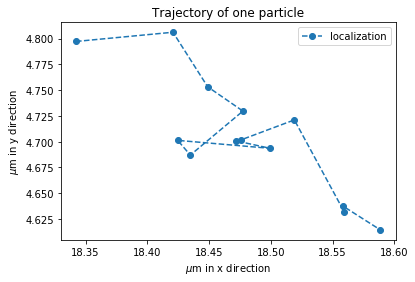

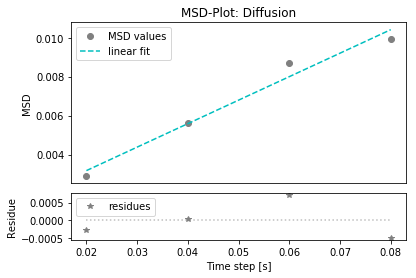

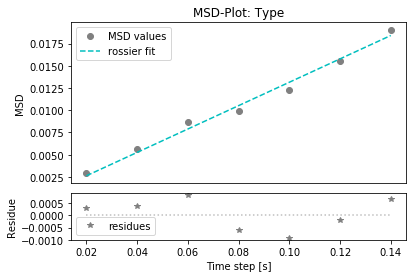

Number: 1
Trajectory length: 13
Diffusion coefficient: 0.030127680033577648 μm²/s
MSD0: 0.0007694425234775785 μm²
chi² linear fit: 0.00011140910086198248 μm⁴
Type immobile: False
Analyse successful? True
chi² rossier fit: 0.0002675535732396599 μm⁴
Type confined: False
Type free: True
D_conf: 0.03287488828624983 μm²/s
r_conf: 5.024525535518655 μm
tau: 255.97913963242576 s
tau threshold: 0.12 s


In [8]:
def plot_trajectory(event):
    widget_load_hdf5.create_clear_output()
    cover_slip.plot_trajectory(widget_load_hdf5.drop_down_cells.value, widget_load_hdf5.drop_down_trajectories.value)
display(widget_load_hdf5.plot_button)
widget_load_hdf5.plot_button.on_click(plot_trajectory)

## Plot diffusion histogram

In [9]:
display(widget_load_hdf5.bin_size_box)

Text(value='0.1', description='bin size', placeholder='size for log10(D) histogram', style=DescriptionStyle(de…

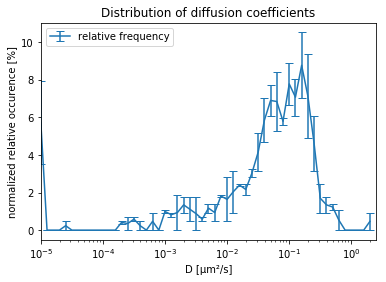

In [10]:
def plot_diffusions(event):
    widget_load_hdf5.create_clear_output()
    track_stats.cell_sizes = [cell.size for cell in cover_slip.cells]
    track_stats.bg_sizes = [background.size for background in cover_slip.backgrounds]
    track_stats.run_plot_diffusion_histogram(widget_load_hdf5.bin_size_box.value)
display(widget_load_hdf5.plot_diffusions_button)
widget_load_hdf5.plot_diffusions_button.on_click(plot_diffusions)